# Decorrelate samples

Author: Dimitris G. Giovanis,
Date: June 25, 2018

In this example, the class 'Decorrelate' is employed to decorrelate standard normal samples generated with the UQpy Correlate class. 

Import the necessary modules.

In [1]:
from UQpy.SampleMethods import MCS, Correlate, Decorrelate
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

Generated uncorrelated standard normal samples using the MCS class. Define the correlation matrix and correlate the samples using the Correlate class.

In [2]:
x = MCS(dimension=2, dist_name=['Normal', 'Normal'], dist_params=[[0, 1], [0, 1]], nsamples=1000)
Rho = np.array([[1.0, 0.9], [0.9, 1.0]])
y = Correlate(x, corr_norm=Rho)

UQpy: Successful execution of MCS design..


Plot both the uncorrelated samples from the MCS class and the correlated samples from the Correlate class.

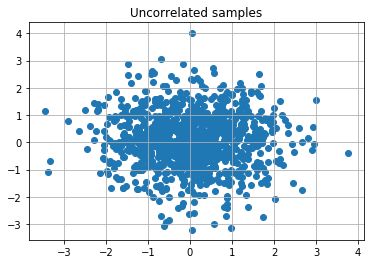

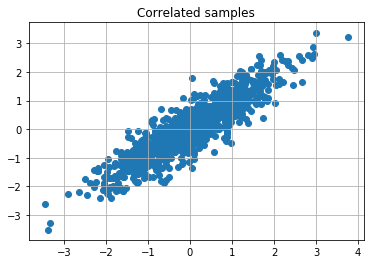

In [3]:
fig, ax = plt.subplots()
plt.title('Uncorrelated samples')
plt.scatter(x.samples[:, 0], x.samples[:, 1])
ax.yaxis.grid(True)
ax.xaxis.grid(True)

fig, ax = plt.subplots()
plt.title('Correlated samples')
plt.scatter(y.samples[:, 0], y.samples[:, 1])
ax.yaxis.grid(True)
ax.xaxis.grid(True)
plt.show()

Use the Decorrelate class to remove correlation from the samples.

In [4]:
y0 = Decorrelate(y, corr_norm=Rho)

Plot the correlated samples from the Correlate class and the uncorrelated samples from the Decorrelate class.

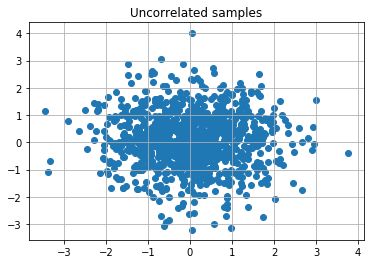

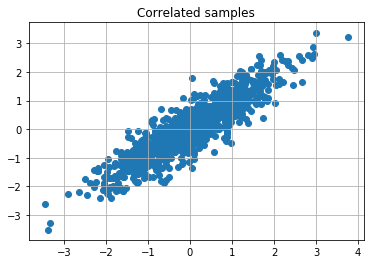

In [5]:
fig, ax = plt.subplots()
plt.title('Uncorrelated samples')
plt.scatter(y0.samples[:, 0], y0.samples[:, 1])
ax.yaxis.grid(True)
ax.xaxis.grid(True)

fig, ax = plt.subplots()
plt.title('Correlated samples')
plt.scatter(y0.samples_corr[:, 0], y0.samples_corr[:, 1])
ax.yaxis.grid(True)
ax.xaxis.grid(True)
plt.show()

Generate 2D correlated standard normal samples using the scipy.stats package and decorrelate the samples using the Decorrelate class.

In [6]:
x_a = stats.multivariate_normal.rvs(mean=np.zeros(2),cov=Rho,size=1000)
y_a = Decorrelate(x_a, corr_norm=Rho, dimension=2)

Caution: The samples provided must be correlated standard normal random variables.


Plot the correlated and the uncorrelated samples.

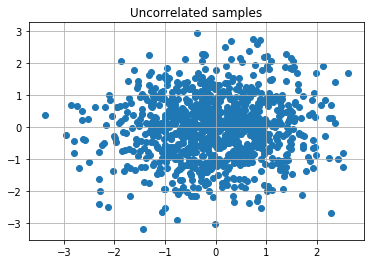

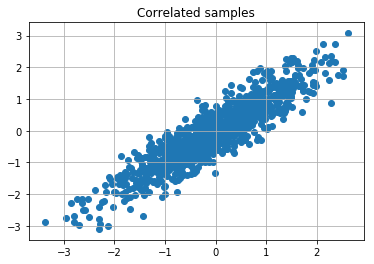

In [7]:
fig, ax = plt.subplots()
plt.title('Uncorrelated samples')
plt.scatter(y_a.samples[:, 0], y_a.samples[:, 1])
ax.yaxis.grid(True)
ax.xaxis.grid(True)

fig, ax = plt.subplots()
plt.title('Correlated samples')
plt.scatter(y_a.samples_corr[:, 0], y_a.samples_corr[:, 1])
ax.yaxis.grid(True)
ax.xaxis.grid(True)
plt.show()